In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sales.csv")

df.columns = [x.lower() for x in df.columns]
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

df

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              113036 non-null  datetime64[ns]
 1   day               113036 non-null  int64         
 2   month             113036 non-null  object        
 3   year              113036 non-null  int64         
 4   customer_age      113036 non-null  int64         
 5   age_group         113036 non-null  object        
 6   customer_gender   113036 non-null  object        
 7   country           113036 non-null  object        
 8   state             113036 non-null  object        
 9   product_category  113036 non-null  object        
 10  sub_category      113036 non-null  object        
 11  product           113036 non-null  object        
 12  order_quantity    113036 non-null  int64         
 13  unit_cost         113036 non-null  int64         
 14  unit

In [4]:
# quantidade total de vendas em cada dia

qtdd_total = df.groupby("date")["order_quantity"].sum()

qtdd_total

date
2011-01-01       8
2011-01-02       9
2011-01-03      17
2011-01-04      10
2011-01-05       5
              ... 
2016-07-27     807
2016-07-28    1332
2016-07-29     895
2016-07-30     843
2016-07-31    1267
Name: order_quantity, Length: 1884, dtype: int64

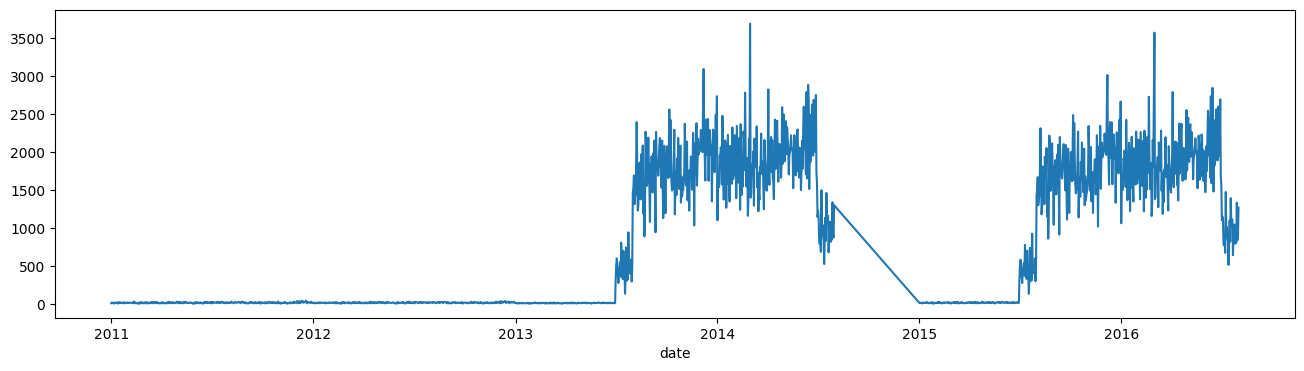

In [5]:
plt.figure(figsize=(16,4))
sns.lineplot(x=qtdd_total.index, y=qtdd_total.values)
plt.show()

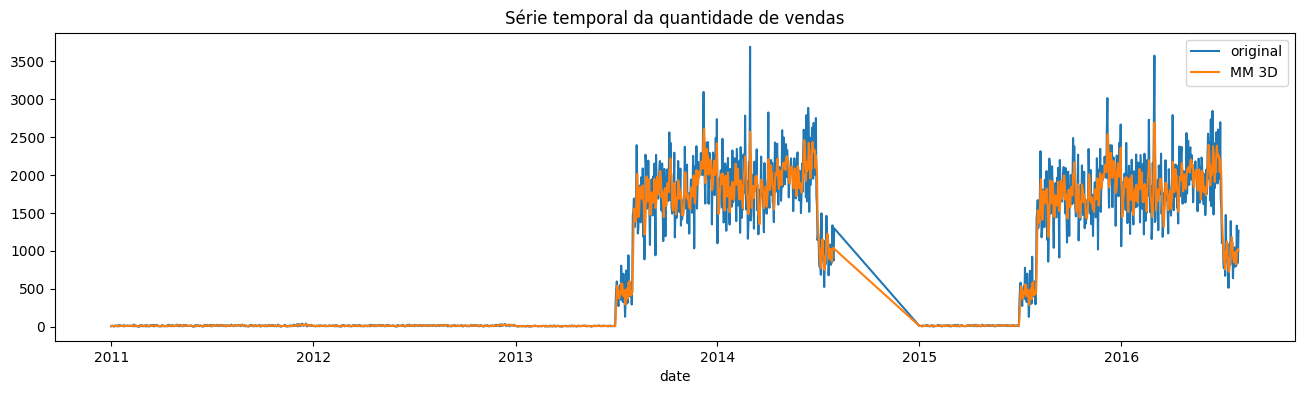

In [6]:
qtdd_total_3d = qtdd_total.rolling(window="3D").mean() 

plt.figure(figsize=(16, 4))
plt.title("Série temporal da quantidade de vendas")
sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original")
sns.lineplot(x=qtdd_total_3d.index, y=qtdd_total_3d.values.squeeze(), label="MM 3D")
plt.show()

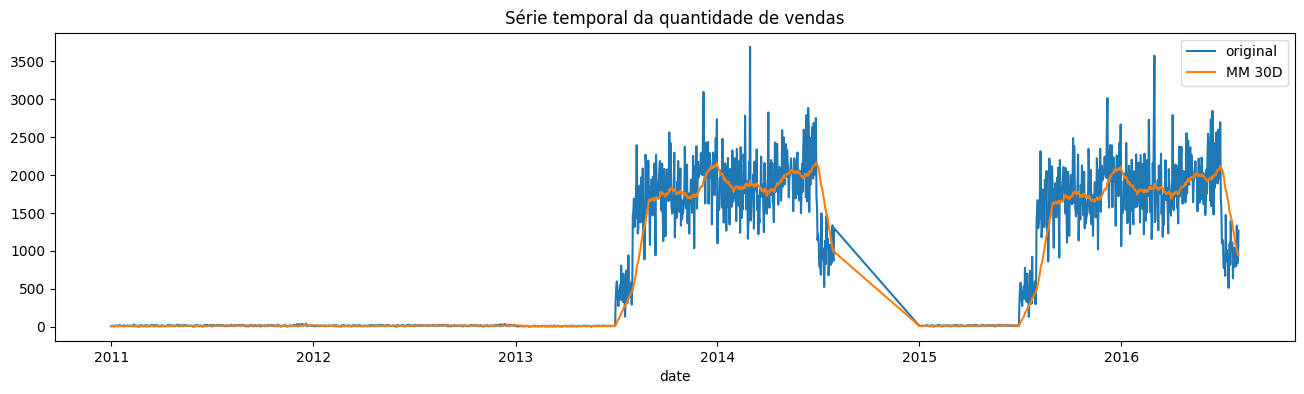

In [7]:
qtdd_total_30d = qtdd_total.rolling(window="30D").mean() 

plt.figure(figsize=(16, 4))
plt.title("Série temporal da quantidade de vendas")
sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original")
sns.lineplot(x=qtdd_total_30d.index, y=qtdd_total_30d.values.squeeze(), label="MM 30D")
plt.show()

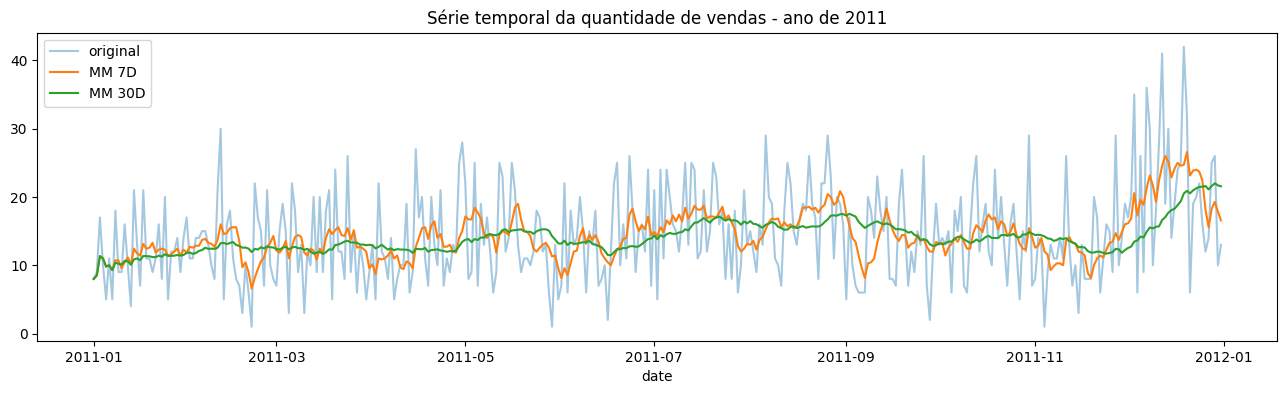

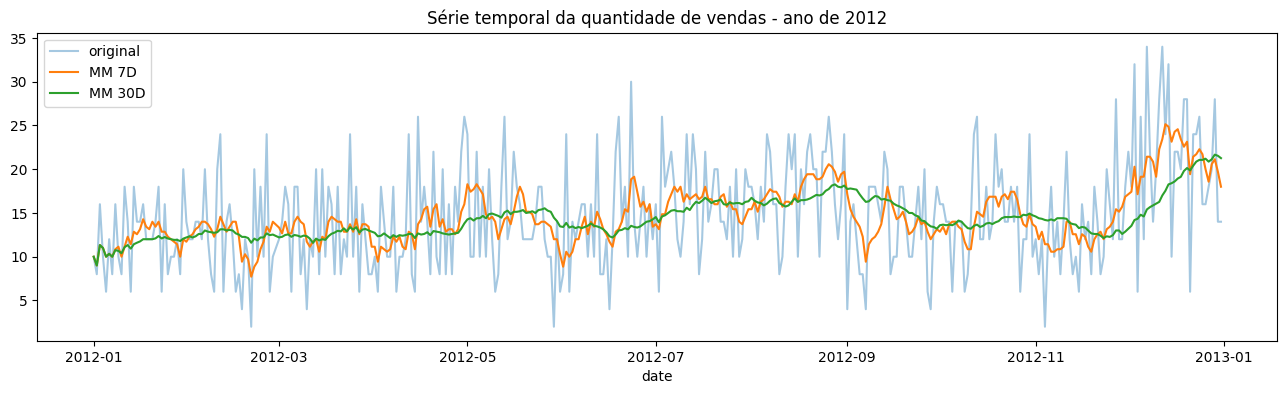

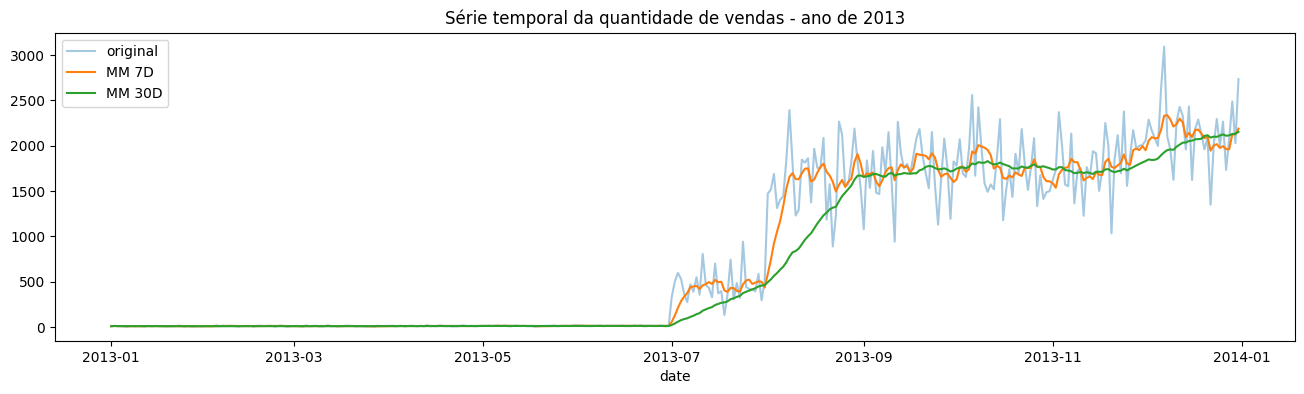

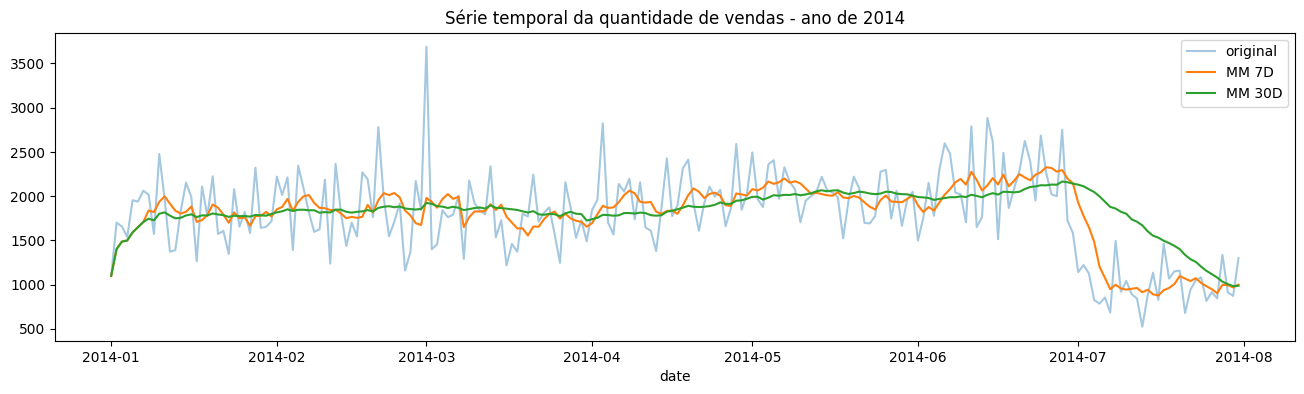

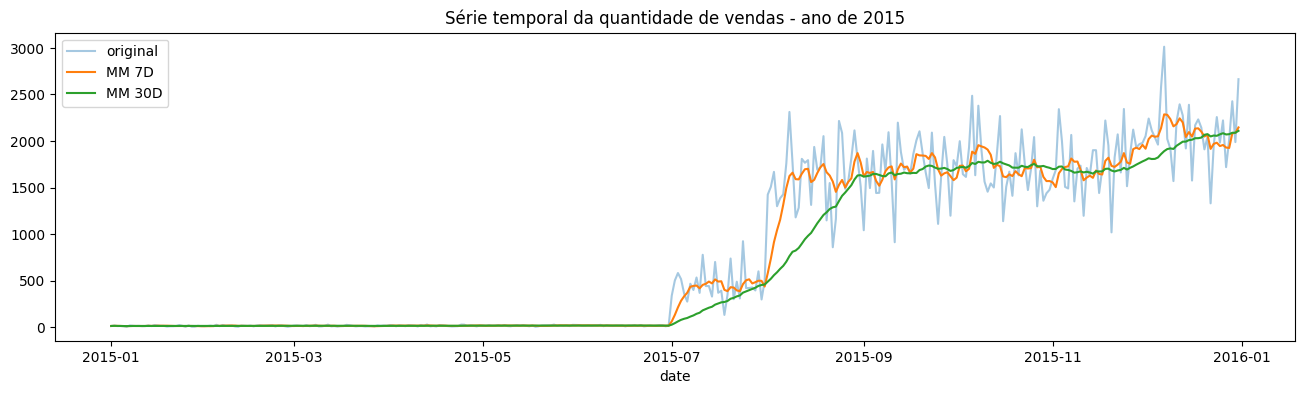

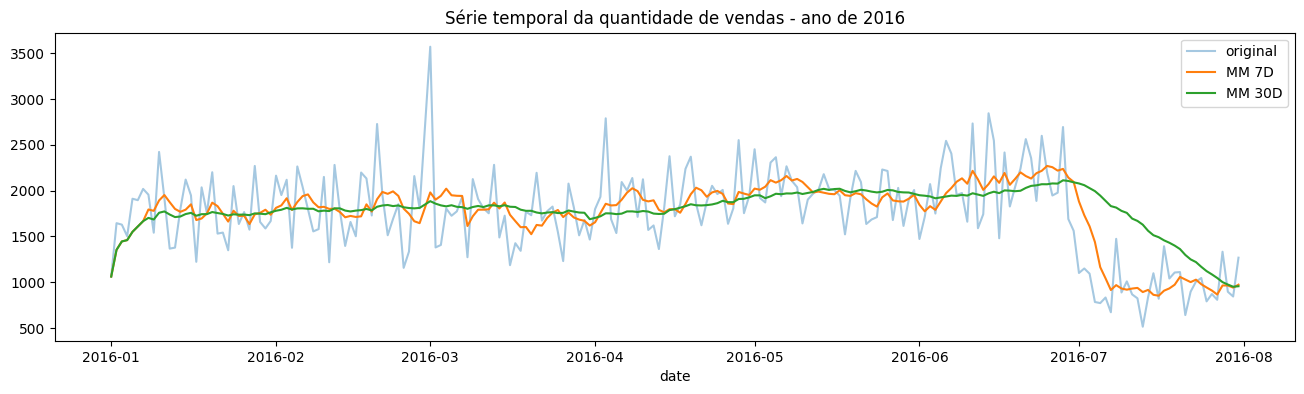

In [8]:
for ano in df["year"].sort_values().unique():

  df_ano = df.query(f"year == {ano}")

  qtdd_total = df_ano.groupby("date")[["order_quantity"]].sum()

  qtdd_total_7d = qtdd_total.rolling(window="7D").mean()
  qtdd_total_30d = qtdd_total.rolling(window="30D").mean() 

  plt.figure(figsize=(16, 4))
  plt.title(f"Série temporal da quantidade de vendas - ano de {ano}")

  sns.lineplot(x=qtdd_total.index, y=qtdd_total.values.squeeze(), label="original", alpha=0.4)
  sns.lineplot(x=qtdd_total_7d.index, y=qtdd_total_7d.values.squeeze(), label="MM 7D")
  sns.lineplot(x=qtdd_total_30d.index, y=qtdd_total_30d.values.squeeze(), label="MM 30D")
  plt.show()

In [9]:
df.groupby("month")[["order_quantity"]].sum()

,order_quantity
month,
April,118467
August,103119
December,133312
February,104717
January,110367
July,89787
June,128591
March,111085
May,125715


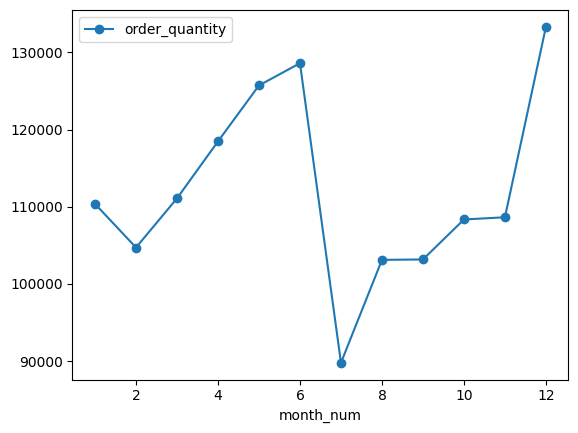

In [10]:
df["month_num"] = df["date"].apply(lambda x: x.month)

df.groupby("month_num")[["order_quantity"]].sum().plot(marker="o")
plt.show()

Total de vendas mensal - ano 2011


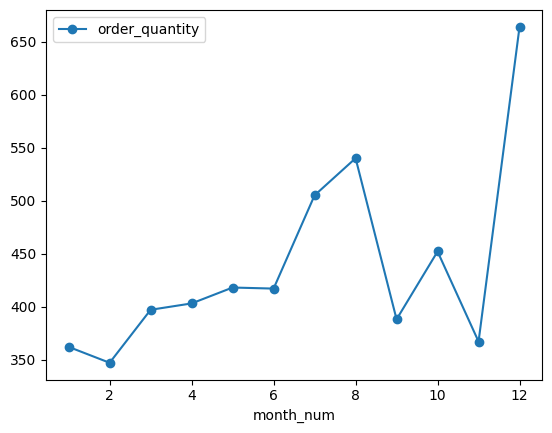

Total de vendas mensal - ano 2012


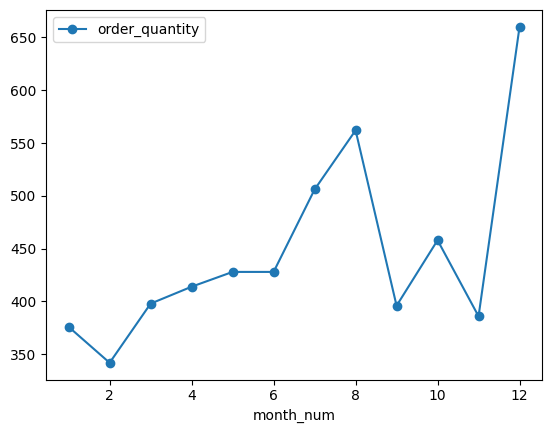

Total de vendas mensal - ano 2013


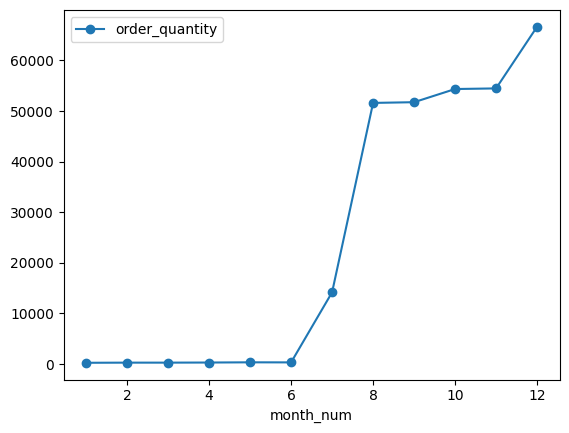

Total de vendas mensal - ano 2014


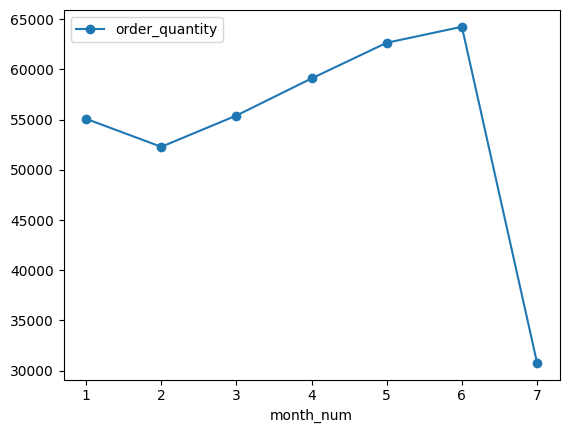

Total de vendas mensal - ano 2015


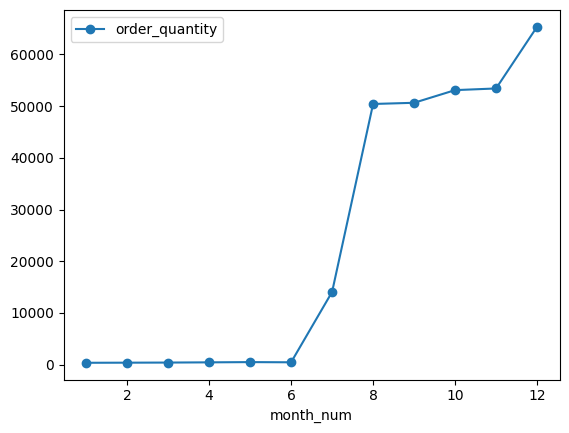

Total de vendas mensal - ano 2016


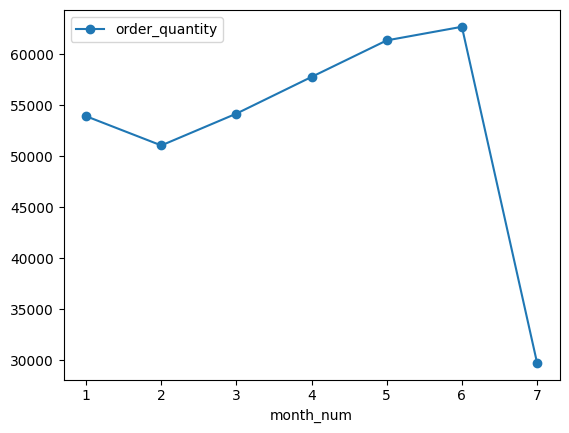

In [11]:
for ano in df["year"].sort_values().unique():

  df_ano = df.query(f"year == {ano}")

  print(f"Total de vendas mensal - ano {ano}")
  df_ano.groupby("month_num")[["order_quantity"]].sum().plot(marker="o")
  plt.show()

In [12]:
df["customer_gender"]

0         M
1         M
2         M
3         M
4         F
         ..
113031    M
113032    M
113033    M
113034    F
113035    F
Name: customer_gender, Length: 113036, dtype: object

In [17]:
df["customer_gender"].value_counts(normalize=True)

customer_gender
M    0.515871
F    0.484129
Name: proportion, dtype: float64

In [13]:
df["age_group"]

0            Youth (<25)
1            Youth (<25)
2         Adults (35-64)
3         Adults (35-64)
4         Adults (35-64)
               ...      
113031    Adults (35-64)
113032       Youth (<25)
113033       Youth (<25)
113034    Adults (35-64)
113035    Adults (35-64)
Name: age_group, Length: 113036, dtype: object

In [15]:
df["customer_age"].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: customer_age, dtype: float64

<Axes: xlabel='customer_age', ylabel='Count'>

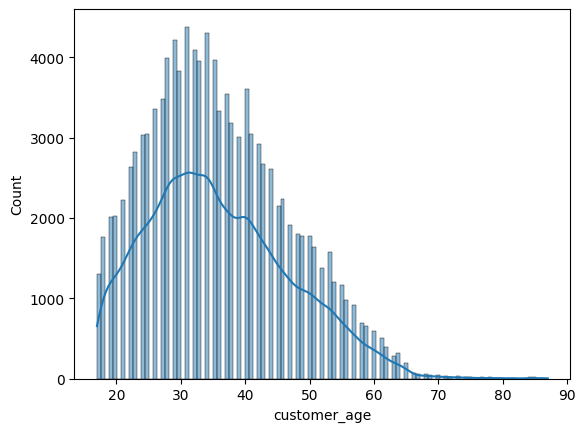

In [16]:
sns.histplot(data=df, x="customer_age", kde=True)

<Axes: xlabel='customer_age', ylabel='Count'>

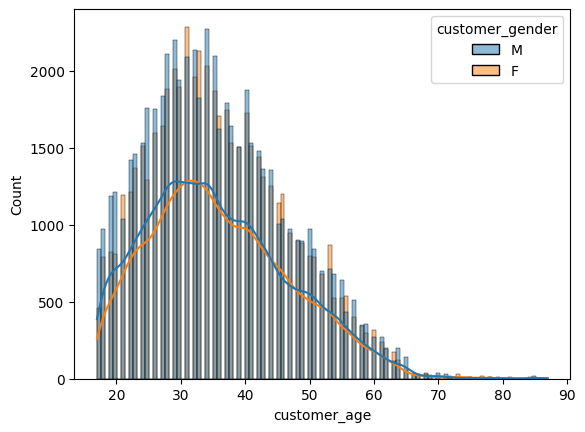

In [18]:
sns.histplot(data=df, x="customer_age", kde=True, hue="customer_gender")

In [19]:
df.groupby("age_group")[["order_quantity"]].sum()

,order_quantity
age_group,
Adults (35-64),672417
Seniors (64+),9877
Young Adults (25-34),446875
Youth (<25),216147


In [21]:
faixa_etaria_ano = df.groupby("age_group year".split())[["order_quantity"]].sum().reset_index()

faixa_etaria_ano

,age_group,year,order_quantity
0,Adults (35-64),2011,2337
1,Adults (35-64),2012,2414
2,Adults (35-64),2013,136850
3,Adults (35-64),2014,200609
4,Adults (35-64),2015,134073
5,Adults (35-64),2016,196134
6,Seniors (64+),2011,12
7,Seniors (64+),2012,14
8,Seniors (64+),2013,1998
9,Seniors (64+),2014,3004


<Axes: xlabel='year', ylabel='order_quantity'>

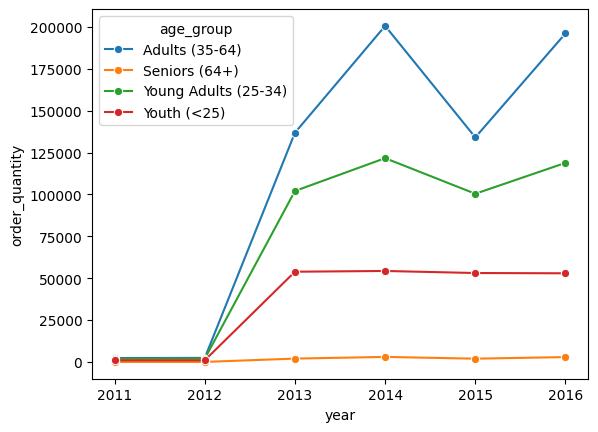

In [23]:
sns.lineplot(data=faixa_etaria_ano, x="year", y="order_quantity", hue="age_group", marker="o")

In [25]:
df["state"].nunique()

53

In [26]:
df["country"].nunique()

6

In [28]:
df["country"].value_counts(normalize=True)

country
United States     0.346845
Australia         0.211756
Canada            0.125429
United Kingdom    0.120493
Germany           0.098181
France            0.097296
Name: proportion, dtype: float64

In [31]:
pais_qtdd = df.groupby("country")[["order_quantity"]].sum().reset_index()

pais_qtdd

,country,order_quantity
0,Australia,263585
1,Canada,192259
2,France,128995
3,Germany,125720
4,United Kingdom,157218
5,United States,477539


<Axes: xlabel='country', ylabel='order_quantity'>

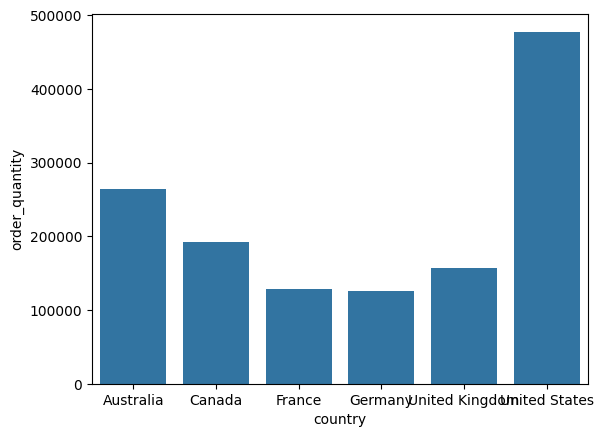

In [32]:
sns.barplot(data=pais_qtdd, x="country", y="order_quantity")